In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [256]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [257]:
df.corr()

/var/folders/gf/f54qhm4d7mb1zzqch8zq5q8w0000gn/T/ipykernel_17714/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [258]:
import missingno as msno

<Axes: >

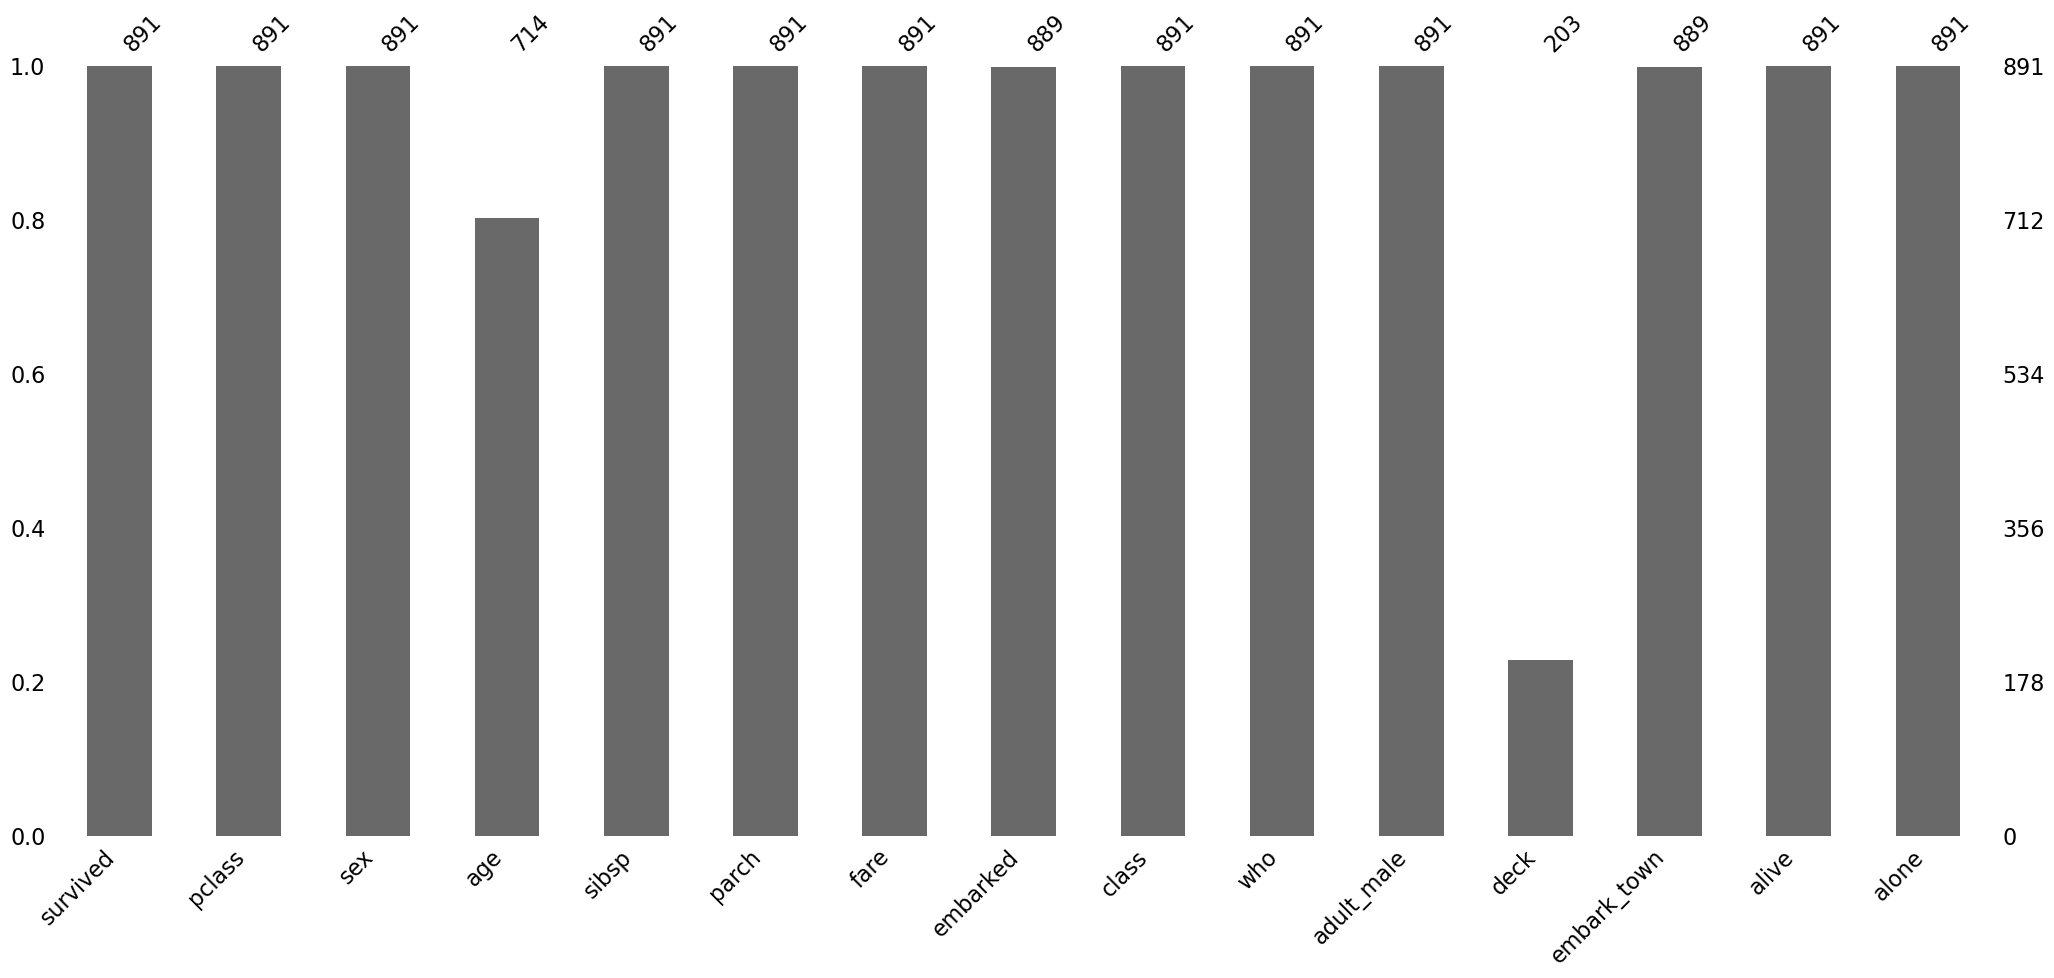

In [259]:
msno.bar(df)

AGE ve DECK missing data barındırıyor 

<Axes: >

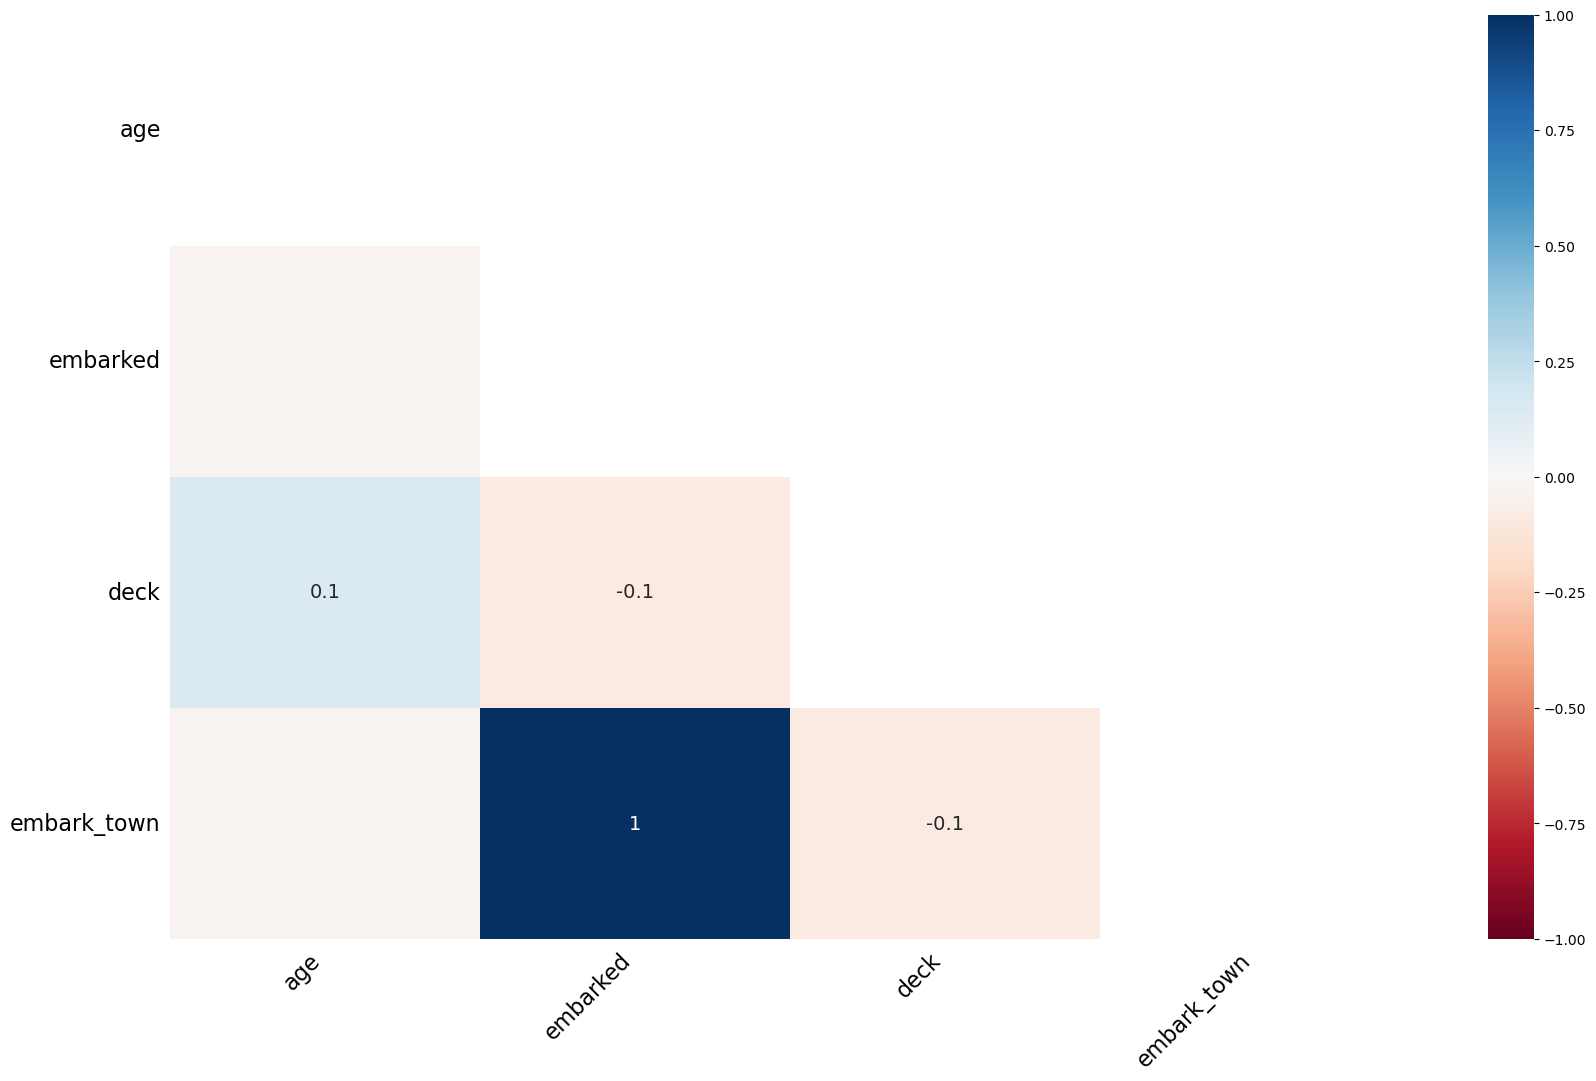

In [260]:
msno.heatmap(df)

deck'in doğrudan bağlı olduğu bir şey göremiyorum deck de çok fazla veri kaybı söz konusu doldurmak
deck sütununu atacağım

In [261]:
df.drop('deck',axis=1,inplace=True)

In [262]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


df['age'].fillna(df.groupby('sex')['age'].transform('mean'),inplace=True)

<Axes: >

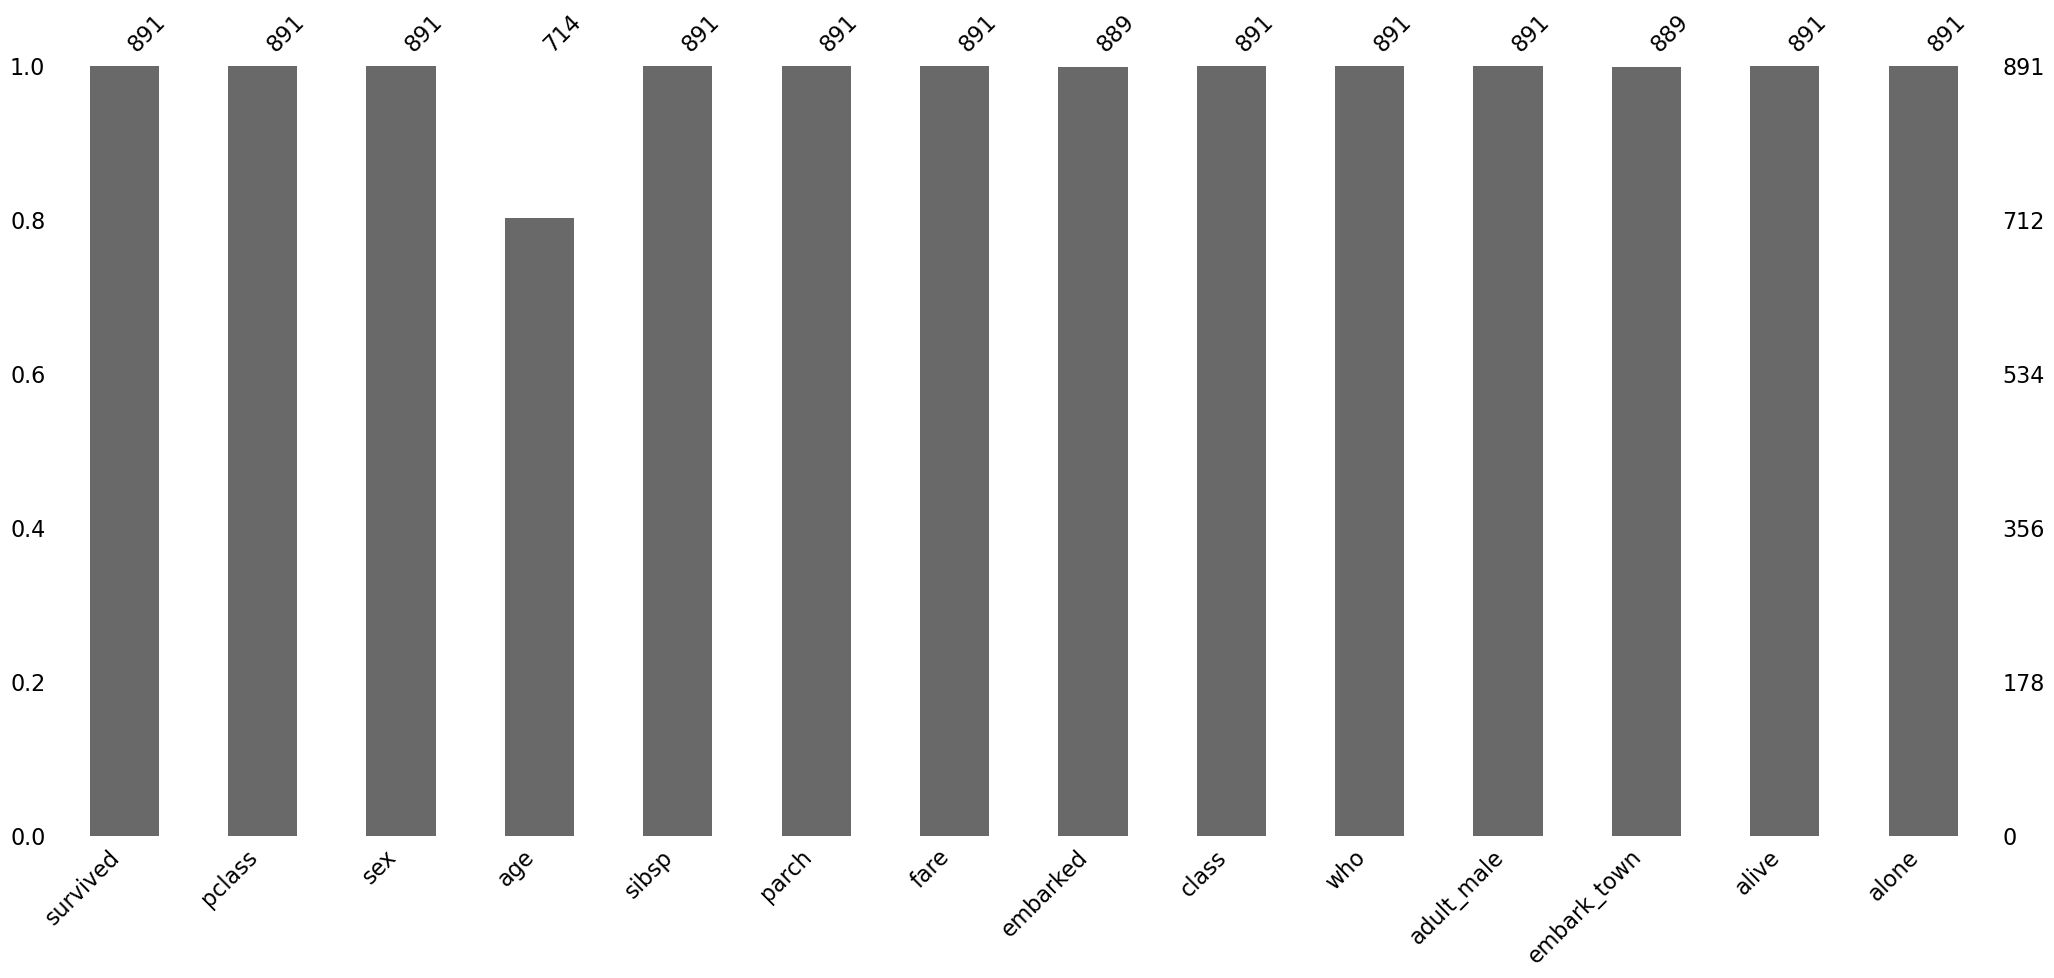

In [263]:
msno.bar(df)

Şimdi bir kaç string sütuna değişim uygulayacağım

In [264]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [265]:
sex=pd.get_dummies(df['sex'],drop_first=True)

In [266]:
new_df = pd.concat([df,sex],axis=1)

In [267]:
new_df.drop(['sex','who','adult_male','embark_town','alive'],axis=1,inplace=True)

In [268]:
new_df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,alone,male
0,0,3,22.0,1,0,7.2500,S,Third,False,1
1,1,1,38.0,1,0,71.2833,C,First,False,0
2,1,3,26.0,0,0,7.9250,S,Third,True,0
3,1,1,35.0,1,0,53.1000,S,First,False,0
4,0,3,35.0,0,0,8.0500,S,Third,True,1


In [269]:
alone = pd.get_dummies(df['alone'],drop_first=True)

In [270]:
alone.columns = ['Alone']

In [271]:
alone.head()

,Alone
0,0
1,0
2,1
3,0
4,1


In [272]:
new_df1=pd.concat([new_df,alone],axis=1)
new_df1.drop('alone',axis=1,inplace=True)

In [273]:
new_df1.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,male,Alone
0,0,3,22.0,1,0,7.2500,S,Third,1,0
1,1,1,38.0,1,0,71.2833,C,First,0,0
2,1,3,26.0,0,0,7.9250,S,Third,0,1
3,1,1,35.0,1,0,53.1000,S,First,0,0
4,0,3,35.0,0,0,8.0500,S,Third,1,1


In [274]:
new_df1['age'].isnull().sum()

177

In [275]:
new_df1['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [276]:
new_df1['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [277]:
new_df1['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

Passenger Class hem pclass hem de class olarak ifade ediliyor bu sebeple class sütununa ihtiyaç kalmadı

In [278]:
new_df1.drop('class',axis=1,inplace=True)
new_df1.drop('embarked',axis=1,inplace=True)


In [279]:
new_df1.where(pd.notna(new_df1),new_df1.mean(),axis='columns',inplace=True)

In [280]:
new_df1.head()

,survived,pclass,age,sibsp,parch,fare,male,Alone
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,1


In [281]:
(new_df1.groupby('male')['survived']).mean()

male
0    0.742038
1    0.188908
Name: survived, dtype: float64

Kadınların Yaşama oranı oldukça fazla 

In [282]:
(new_df1.groupby('pclass')['survived']).mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

1.sınıf bi yolcunun yaşaması diğer yolculara göre daha olası gözüküyor 

In [283]:
age=pd.cut(new_df1['age'],(0,18,60,80))
new_df1.pivot_table('survived',['male',age],['pclass'])

pclass                1         2         3
male age                                   
0    (0, 18]   0.909091  1.000000  0.511628
     (18, 60]  0.975309  0.903226  0.490000
     (60, 80]  1.000000       NaN  1.000000
1    (0, 18]   0.800000  0.600000  0.215686
     (18, 60]  0.380952  0.077778  0.123288
     (60, 80]  0.083333  0.333333  0.000000

YAPICLACAK ÇIKARIMLAR !!!

ERKEKLER:
1)Erkeklerin hayatı genel olarak geride bırakılmış
2)Erkek çocuklarını hayaşama ihtimali daha yüksek
KADINLAR:
1)Kadınların yaşama ihtimali oldukça yüksek
2)Kız çocukları yaşama ihtimali yüksek


Sınıf bakımında en pahalı bilet yani en iyi class da yolculuk eden yolcuların yaşamı daha önce tutulmuş çocuklar ve kadınlar da önce tutulmuş

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [285]:
X=new_df1.drop('survived',axis=1)
y=new_df1['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.isnull().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
male      0
Alone     0
dtype: int64

In [286]:
reg = LogisticRegression()

In [287]:
model=reg.fit(X_train,y_train)

/Users/aniltek/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [288]:
X_test.isnull().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
male      0
Alone     0
dtype: int64

In [289]:
predictions =model.predict(X_test)

In [290]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

[[132  22]
 [ 38  76]]


%78 accuracy kötü bir sonuç % 22 lik bir ıskalama payı bulunuyor 